# De Community Challenge - week 49

In deze notebook gaan we een dataset van de Bit Academy onderzoeken. De opdracht is:

### Jarvis Ratings

Bit Academy wil zijn Jarvis opdrachten gaan verbeteren om te zorgen voor een betere leeromgeving. Op basis van de feedback van studenten gaan we kijken welke opdrachten wel en niet herzien moeten worden.

Per gemaakte Jarvis opdracht kunnen studenten een rating geven. Als de gemiddelde rating van een bepaalde opdracht te laag is, dan wordt de opdracht herzien aan de hand van de feedback.

Aan jou de taak om een programma te schrijven dat kijkt welke opdrachten moeten worden herzien. Gegeven is een Jarvis Ratings bestand. Hierin staan alle ratings van de opdrachten waar we naar gaan kijken. Open het bestand even in excel of in je editor om kijken hoe de data eruit ziet.

Laat bij elke vraag zien hoe je aan je antwoord bent gekomen (zet comments bij je code).
1. Hoeveel ratings zijn er totaal gegeven?
2. Laat per opdracht zien hoeveel ratings de opdracht heeft en geef de namen van de opdrachten met een gemiddelde rating lager dan 3.
3. Op 1 mei 2021 is de opdracht Flex met boxen herzien, heeft dat geleid tot betere ratings?

Web traject: Maak een webpagina waarop je alle bovenstaande antwoorden overzichtelijk weergeeft.
Data traject: Maak een grafiek waarin je laat zien wat de invloed was van de herzage.
Upskill: Vrije keuze, kies 1 van beide trajecten, of combineer ze :)

We beginnen deze opdracht met het importeren van de modules en het inlezen van het bestand.


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

df = pd.read_csv('ratings.csv')
df.head(3)

,exercise,first_name,last_name,rating,date
0,Flex met boxen,Fergus,Crowther,5,2021-10-29
1,Commandline commands,Monica,Bartaloni,5,2021-01-05
2,Read that data,Prissie,Prangle,5,2021-10-26


Om de eerste vraag te beantwoorden maken we gebruik van de `unique` functie van pandas. We willen weten hoeveel ratings er zijn gegeven. Algemeen gezien printen we het aantal rijen nog uit en tellen de NaN waardes in de dataframe.

In [44]:
print(f'De database bevat {df.isna().sum().sum()} NaN-values.')
print(f'De database bevat {len(df.index)} rijen.')
rating = df.rating.unique()
rating = sorted(rating, reverse=False)
print(f'De volgende ratings zijn afgegeven: {str(rating)[1:-1]}')

De database bevat 0 NaN-values.
De database bevat 1000 rijen.
De volgende ratings zijn afgegeven: 1, 2, 3, 4, 5


We willen nu weten hoeveel ratings een opdracht heeft en willen de namen weten van de opdrachten met een gemiddelde rating lager dan 3. 
Om deze vraag te beantwoorden sorteren we de dataframe op opdrachten en tellen hoeveel ratings er zijn.
Daarna sorteren we de database op gemiddelde ratings en printen de opdrachten die een gemiddelde lager dan 3 hebben.

<AxesSubplot:xlabel='exercise'>

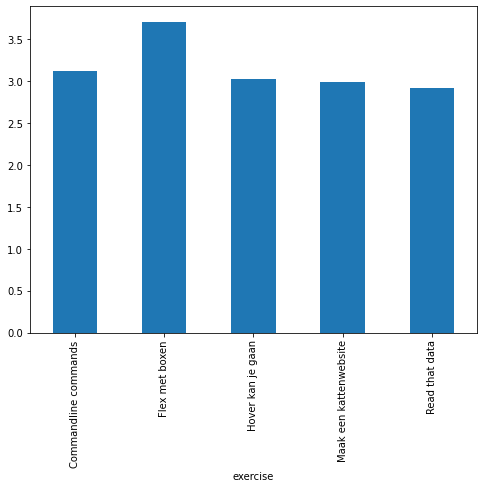

In [45]:
#df_rating = df.groupby('exercise')
# grouped_single = df.groupby('Team').agg({'Age': ['mean', 'min', 'max']})
df_mean = df.groupby('exercise')['rating'].mean()

df_mean.plot.bar(figsize=(8, 6))

                 exercise  rating_mean
4          Read that data     2.921569
3  Maak een kattenwebsite     2.989899
2       Hover kan je gaan     3.023148
0    Commandline commands     3.116402
1          Flex met boxen     3.704663

In een barplot ziet het er zo uit:


<AxesSubplot:>

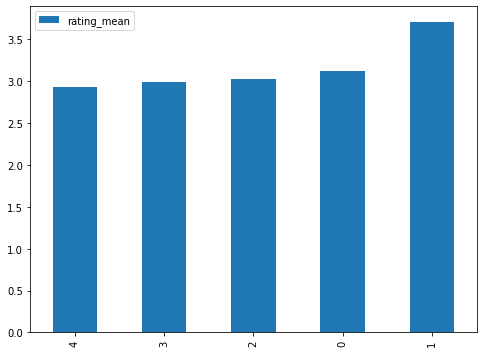

In [48]:
# groepeer op exercise en bereken de gemiddelde waarde
grouped_rating = df.groupby('exercise').agg({'rating': ['mean']})

# hernoem de kolom rating en sorteer van laag naar hoog
grouped_rating.columns = ['rating_mean']
grouped_rating = grouped_rating.reset_index().sort_values('rating_mean')

print(grouped_rating)
print('')
print('In een barplot ziet het er zo uit:')

grouped_rating.plot.bar(figsize=(8, 6))

                 exercise  rating_mean
4          Read that data     2.921569
3  Maak een kattenwebsite     2.989899
2       Hover kan je gaan     3.023148
0    Commandline commands     3.116402
1          Flex met boxen     3.704663

In een barplot ziet het er zo uit:


(2.5, 3.8)

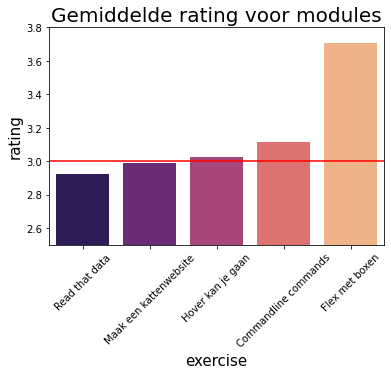

In [76]:
# groepeer op exercise en bereken de gemiddelde waarde
grouped_rating = df.groupby('exercise').agg({'rating': ['mean']})

# hernoem de kolom rating en sorteer van laag naar hoog
grouped_rating.columns = ['rating_mean']
grouped_rating = grouped_rating.reset_index().sort_values('rating_mean')

print(grouped_rating)
print('')
print('In een barplot ziet het er zo uit:')

#grouped_rating.plot.bar(figsize=(8, 6))

sns.barplot(x='exercise', y='rating_mean', data=grouped_rating, palette = 'magma',)
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Gemiddelde rating voor modules", fontsize=20)
plt.xlabel("exercise", fontsize=15)
plt.ylabel("rating", fontsize=15)
plt.axhline(y=3.0, color='r', linestyle='-')
plt.ylim([2.5, 3.8])

We zien in het dataframe dat de modules "Maak een kattenwebsite" en "Read the data" een rating lager dan 3 hebben.

Voor de laatste opdracht willen we onderzoeken of er betere ratings zijn nadat de opdracht Flex met boxen is herzien. We gaan voor deze opdracht twee dataframes maken met data vanaf/voor 1 mei 2021 (dan is de opdracht herzien). Deze uitkomsten plotten we in 2 barplots.

In [ ]:
fig, axs = plt.subplots(2,1, figsize=(8,10), sharey=True)

# rotate ticklabels for all axes
for ax in axs:
    ax.tick_params(labelrotation=45)

# titel voor de gehele plot aangeven
fig.suptitle('Pokemon stats by type', fontsize=20, color='black')

# plot 1:
sns.barplot(ax=axs[0], data=df1, x='type1', y='size')

# titel aangeven voor plot 1
axs[0].set(xlabel=None, ylabel='type 1')

# plot2
sns.barplot(ax=axs[1], data=df2, x='type2', y='size')
axs[1].set(xlabel=None, ylabel='type 2')